In [1]:
import os, sys, re, collections, string
from operator import itemgetter as at
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
sys.path.append("../python")
import data
%matplotlib inline

Read the data
---

In [2]:
df = data.asDataFrame()
df

,file,tag
num,,
4908,employment-04908.txt,employment
15805,employment-15805.txt,employment
1252,SPA-01252.txt,SPA
1534,SPA-01534.txt,SPA
3901,employment-03901.txt,employment
9592,employment-09592.txt,employment
8854,employment-08854.txt,employment
6879,employment-06879.txt,employment
9586,employment-09586.txt,employment


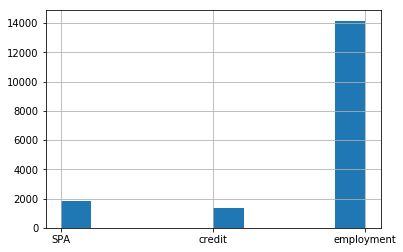

In [3]:
df.tag.hist()

In [4]:
print(data.readFile("employment-10964.txt"))

* * *

Exhibit 10.1 



This EMPLOYMENT AGREEMENT (the “Agreement”), is dated as of January 7, 2013 by and between China BAK Battery, Inc., a corporation incorporated under the laws of the State of Nevada, U.S. (the “Company”) and Danny Pan (the “Employee”). 

RECITALS 

A. The Company has appointed the Employee as its Chief Financial Officer and the Employee has accepted such appointment for the term of Employment (as defined below). 

B. In connection with such appointment, the Company and the Employee desire to enter into this Agreement setting forth the terms and conditions of the Employment. 

AGREEMENT 

The parties hereto agree as follows:  
  
1\. 

POSITION  
  
The Employee hereby accepts a position of Chief Financial Officer (the “Employment”) of the Company.  
  
2\. 

TERM  
  
Subject to the terms and conditions of this Agreement, the initial term of the Employment shall commence on January 7, 2013 (the “Effective Date”), until January 7, 2015, unless terminated sooner pu

In [5]:
i = 0
for tag, body in data.getIterator():
    print ("="* 100)
    print (tag)
    print ("-"* 100)
    print (body[:1000])
    i+=1
    if i>=3:
        break

employment
----------------------------------------------------------------------------------------------------
EXHIBIT 10.35



This Employment Agreement (this “Agreement”) is made and entered into as of November 30, 2009 (the “Effective Date”) by and between CytRx Corporation, a Delaware corporation (“Employer”), and Scott Geyer, an individual and resident of the State of California (“Employee”).

WHEREAS, Employer desires to employ Employee, and Employee is willing to be employed by Employer, on the terms set forth in this Agreement.

NOW, THEREFORE, upon the above premises, and in consideration of the mutual covenants and agreements hereinafter contained, the parties hereto agree as follows.

1. Employment. Effective as of the Effective Date, Employer shall employ Employee, and Employee shall serve, as Employer’s Senior Vice President – Manufacturing on the terms set forth herein.

2. Duties; Place of Employment. Employee shall perform in a professional and business-like manner, an

Preprocess
---

In [6]:
sample_doc = data.readFile("SPA-00155.txt")
print (sample_doc)

Exhibit 10.7

  




This Stock Purchase Agreement (this “Agreement”) is made as of April 10, 2015 by and between the persons set forth on Exhibit A attached hereto (each an “Investor” and collectively, the “Investors”) and Brazil Minerals, Inc., a Nevada corporation (the “Company”).

WHEREAS, upon the terms and conditions set forth in this Agreement, the Company proposes to issue and sell to each Investor the aggregate number of shares of common stock of the Company (the “Common Stock”) set forth opposite the name of such Investor on Exhibit A hereto for the aggregate purchase price set forth opposite the Investor’s name on Exhibit A hereto.

NOW, THEREFORE, in consideration of the mutual covenants and agreements set forth herein and for good and valuable consideration, the receipt and adequacy of which are hereby acknowledged, the parties hereto agree as follows:

ARTICLE I   
  
SALE OF SECURITIES

Subject to the terms and conditions of this Agreement, each Investor agrees to purcha

### Replacing uninformative tokens
In this example we replace all numeric tokens with a `<NUM>` token

In [7]:
digits = re.compile(r"\d[\d\.\$]*")
sample_doc = digits.sub("<NUM>", sample_doc)
print (sample_doc)

Exhibit <NUM>

  




This Stock Purchase Agreement (this “Agreement”) is made as of April <NUM>, <NUM> by and between the persons set forth on Exhibit A attached hereto (each an “Investor” and collectively, the “Investors”) and Brazil Minerals, Inc., a Nevada corporation (the “Company”).

WHEREAS, upon the terms and conditions set forth in this Agreement, the Company proposes to issue and sell to each Investor the aggregate number of shares of common stock of the Company (the “Common Stock”) set forth opposite the name of such Investor on Exhibit A hereto for the aggregate purchase price set forth opposite the Investor’s name on Exhibit A hereto.

NOW, THEREFORE, in consideration of the mutual covenants and agreements set forth herein and for good and valuable consideration, the receipt and adequacy of which are hereby acknowledged, the parties hereto agree as follows:

ARTICLE I   
  
SALE OF SECURITIES

Subject to the terms and conditions of this Agreement, each Investor agrees to p

### Remove punctuation and unknown charactars

In [8]:
not_allowed = re.compile(r"[^\s\w<>_]")
sample_doc = not_allowed.sub("", sample_doc)
print (sample_doc)

Exhibit <NUM>

  




This Stock Purchase Agreement this Agreement is made as of April <NUM> <NUM> by and between the persons set forth on Exhibit A attached hereto each an Investor and collectively the Investors and Brazil Minerals Inc a Nevada corporation the Company

WHEREAS upon the terms and conditions set forth in this Agreement the Company proposes to issue and sell to each Investor the aggregate number of shares of common stock of the Company the Common Stock set forth opposite the name of such Investor on Exhibit A hereto for the aggregate purchase price set forth opposite the Investors name on Exhibit A hereto

NOW THEREFORE in consideration of the mutual covenants and agreements set forth herein and for good and valuable consideration the receipt and adequacy of which are hereby acknowledged the parties hereto agree as follows

ARTICLE I   
  
SALE OF SECURITIES

Subject to the terms and conditions of this Agreement each Investor agrees to purchase and the Company agrees to 

### Putting it all together

In [9]:
def clean_text(text):
    return not_allowed.sub("", digits.sub("<NUM>",text.lower()))

Bag of words vecorization
---

In [10]:
def bag_of_words(text):
    return collections.Counter(text.split())

In [11]:
bag_of_words("My dog is bigger than your dog")

Counter({'My': 1, 'bigger': 1, 'dog': 2, 'is': 1, 'than': 1, 'your': 1})

In [12]:
vocabulary = ["dog", "cat", "bigger"]
def BOW_vector(text):
    return at(*vocabulary)(bag_of_words(text))

In [13]:
BOW_vector("My dog is bigger than your dog")

(2, 0, 1)

## Preparing for modelling

In [14]:
vocabulary = ["share", "stock", "loan", "obligation", "agreement", "employee"]
df = data.asDataFrame(vectorizer=BOW_vector)
df

,vector,tag
num,,
4908,"(0, 4, 0, 1, 3, 1)",employment
15805,"(0, 3, 0, 2, 7, 8)",employment
1252,"(1, 0, 0, 0, 5, 0)",SPA
1534,"(3, 0, 0, 3, 4, 0)",SPA
3901,"(0, 4, 0, 3, 2, 1)",employment
9592,"(0, 0, 0, 0, 1, 2)",employment
8854,"(0, 2, 0, 0, 1, 0)",employment
6879,"(0, 0, 0, 1, 2, 0)",employment
9586,"(0, 0, 0, 0, 1, 0)",employment


In [15]:
X = df.vector
y = df.tag